# Simulation9

**Mengqi Liu**

**Aug 29, 2023**
___

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import expfunc
from scipy.stats import percentileofscore
from PIL import Image

## Simulation result correction

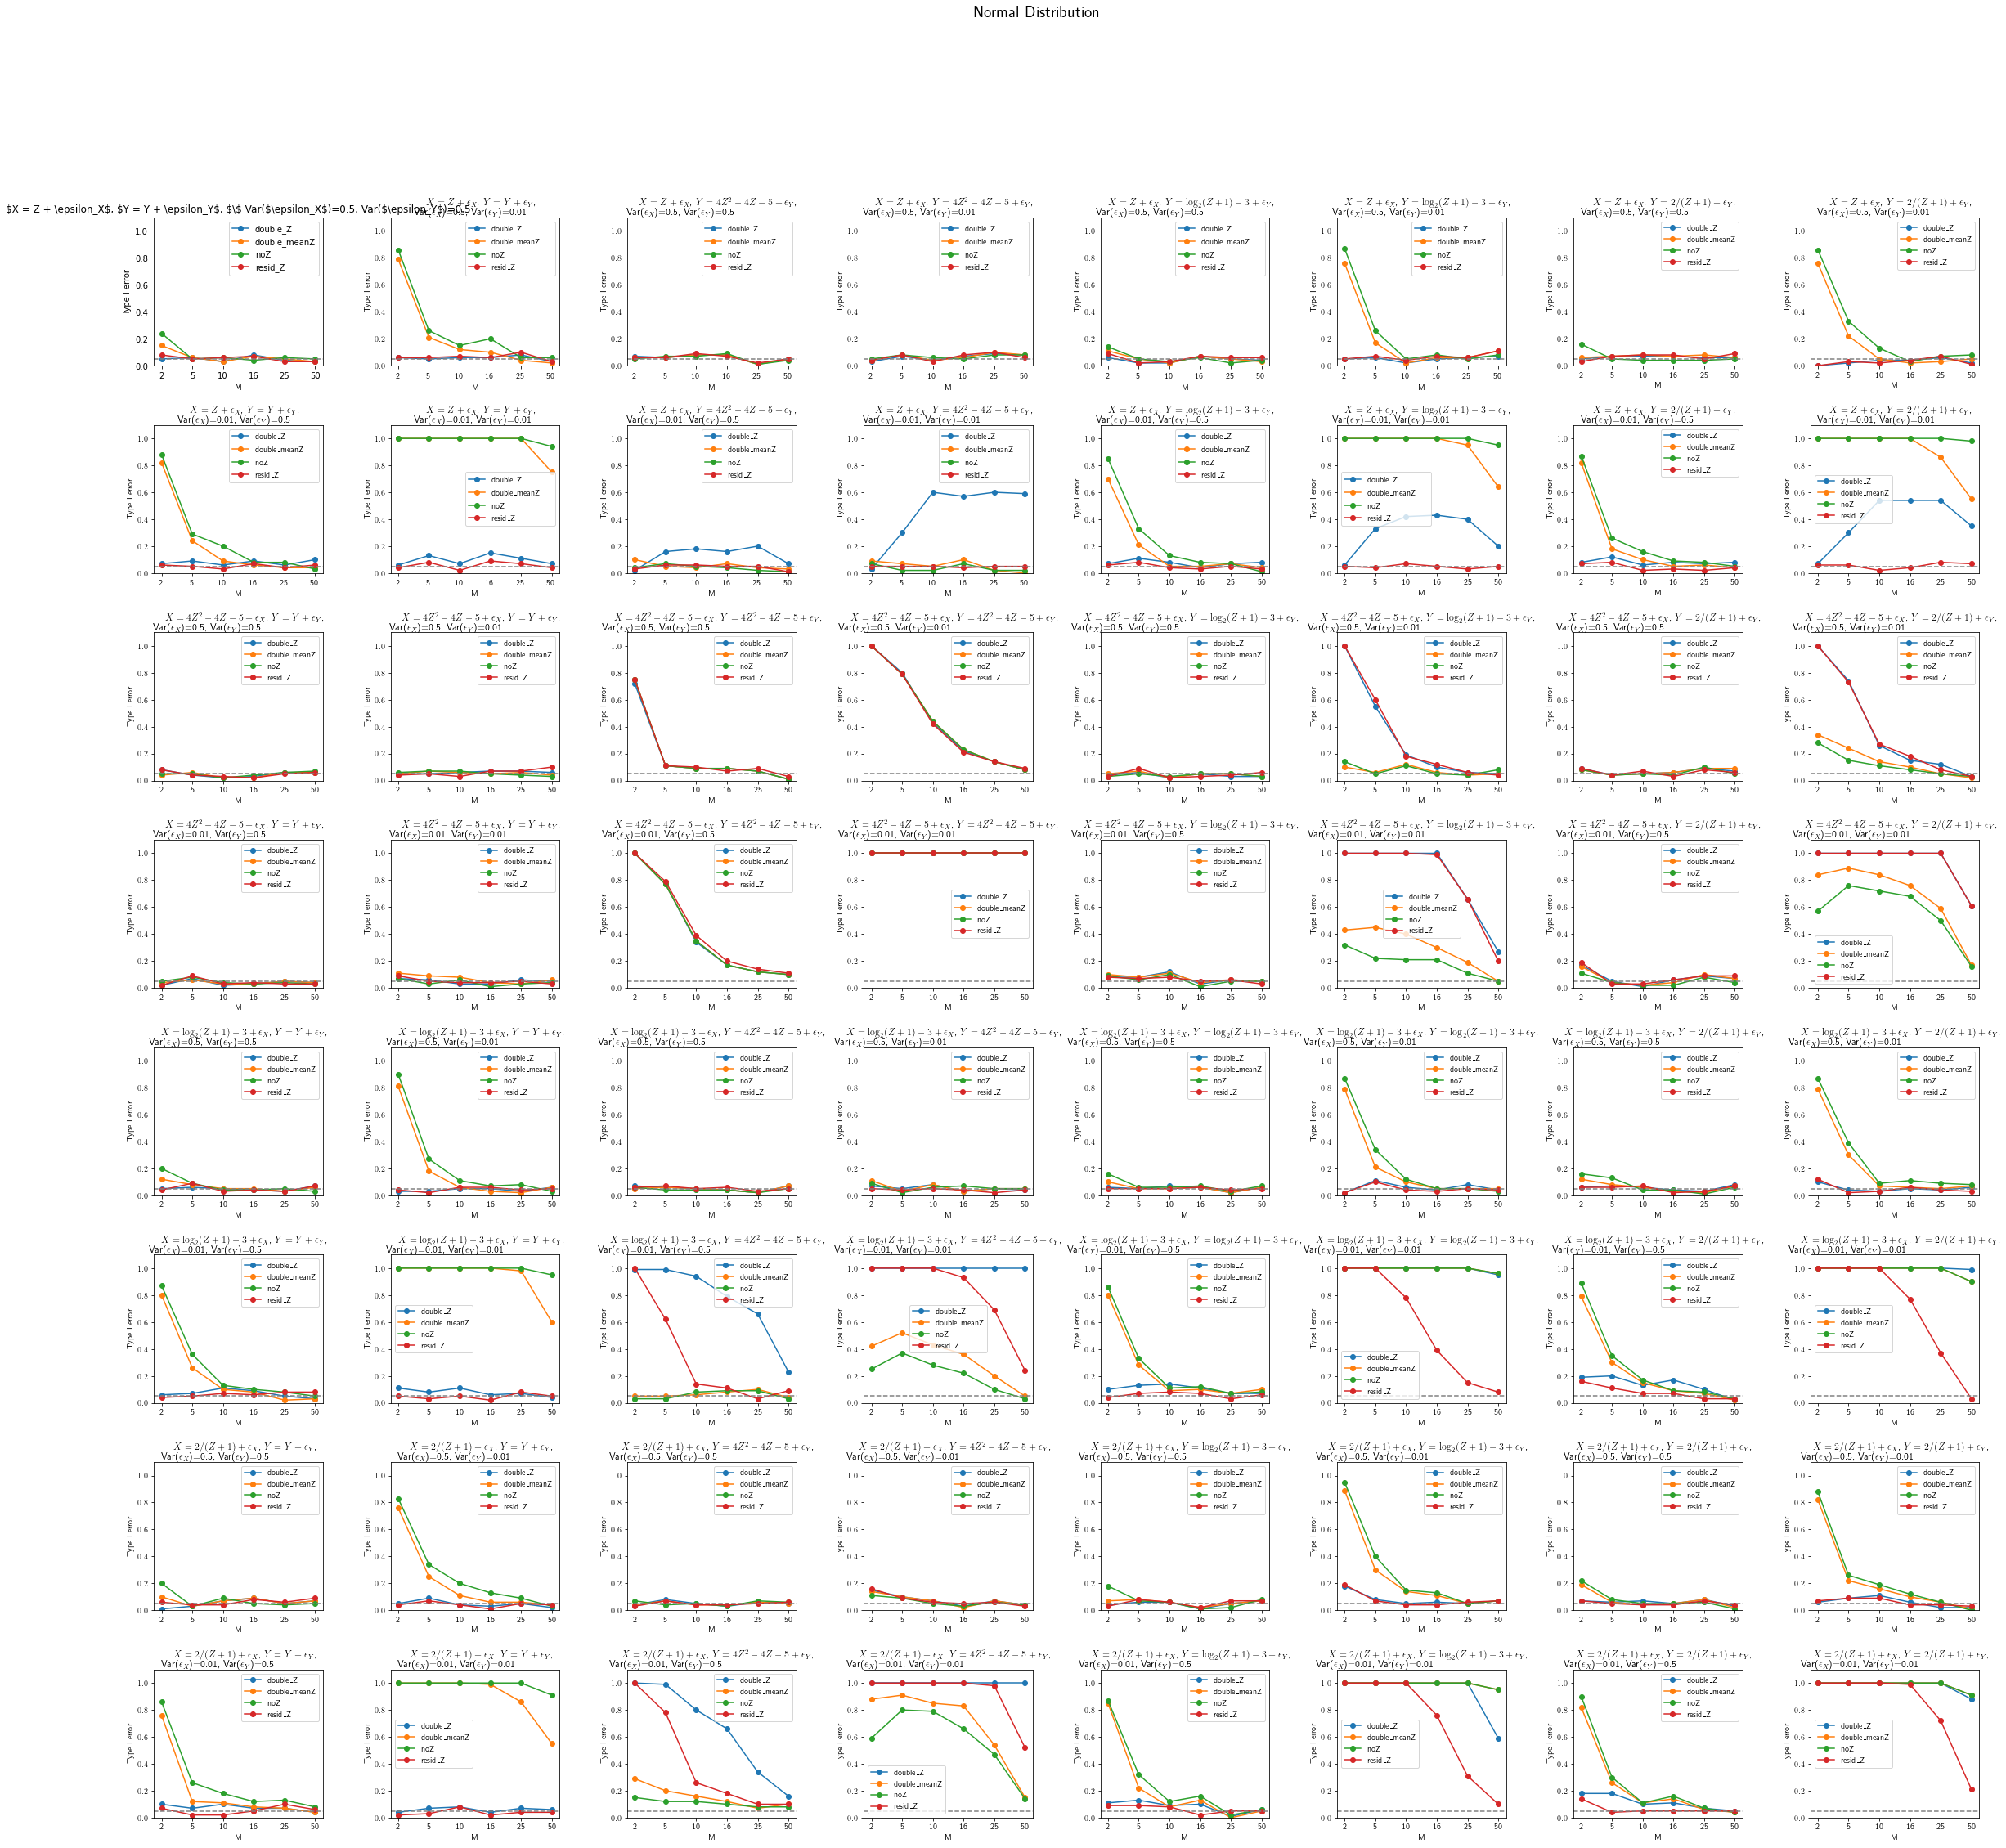

In [2]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(4):
    for yf in range(4):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result = pd.read_csv("./results/result_10_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

## Different generating functions

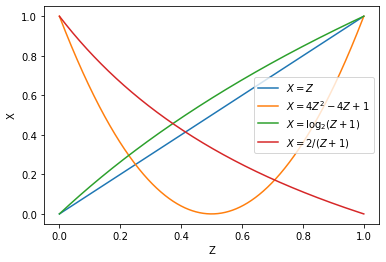

In [18]:
Z = np.linspace(0, 1, 1000)
xfuns = [None, expfunc.Z_to_Y, expfunc.Z_to_Y2, expfunc.Z_to_Y3]
xfuns_label = ['$X = Z$', '$X = 4Z^2 - 4Z+1$', '$X = \log_2(Z+1)$', '$X = 2/(Z+1) $']
colormap = plt.cm.tab10
for xf in range(len(xfuns)):
    if xfuns[xf] != None:
        y = [xfuns[xf](z) for z in Z]
        y += -np.min(y)
    else:
        y = Z
    plt.plot(Z, y, label=xfuns_label[xf], color=colormap(xf))

plt.xlabel("Z")
plt.ylabel("X")
plt.legend()
plt.show()

## Analysis

 - Methods:
   ($\tilde{Z}$ is the discretized $Z$, and the data belonging to the same group share the same $\tilde{Z}$.)
   - "double_Z": permute $X$ within each bin. At each time, regress $Y$ on $1,Z$ and regress $X$ on $1,Z$ separately, and take the *absolute* correlation between residuals from two linear regressions as the test statistic.
   
   \begin{align}
   \textrm{cor}(P_{Z^{\perp}}X_{\sigma}, P_{Z^{\perp}}Y)&=\frac{\mathbb{E}(X_\sigma^\top P_{Z^{\perp}}P_{Z^{\perp}}Y)-\mathbb{E}(P_{Z^{\perp}}X_{\sigma})\mathbb{E}(P_{Z^{\perp}}Y)}{\sqrt{\textrm{Var}(P_{Z^{\perp}}X_{\sigma})\textrm{Var}(P_{Z^{\perp}}Y)}}\\
   &\propto \frac{\mathbb{E}(X_\sigma^\top P_{Z^{\perp}}Y)}{\textrm{SD}(P_{Z^{\perp}}X_\sigma)}
   \end{align}
   
   
   - "double_meanZ": permute $X$ within each bin. At each time, regress $Y$ on $1,\tilde{Z}$ and regress $X$ on $1,\tilde{Z}$ separately, and take the *absolute* correlation between residuals from two linear regressions as the test statistic.
   
   \begin{align}
   \textrm{cor}(P_{\tilde{Z}^{\perp}}X_{\sigma}, P_{\tilde{Z}^{\perp}}Y)&=\frac{\mathbb{E}(X_\sigma^\top P_{\tilde{Z}^{\perp}}P_{\tilde{Z}^{\perp}}Y)-\mathbb{E}(P_{\tilde{Z}^{\perp}}X_{\sigma})\mathbb{E}(P_{\tilde{Z}^{\perp}}Y)}{\sqrt{\textrm{Var}(P_{\tilde{Z}^{\perp}}X_{\sigma})\textrm{Var}(P_{\tilde{Z}^{\perp}}Y)}}\\
   &\propto \mathbb{E}(X_\sigma^\top P_{\tilde{Z}^{\perp}}Y)
   \end{align}
   
   
   - "noZ": use $cor(X,Y)$ as test statistic with local permutation in $X$ with respect to $Z$.
   \begin{align}
   \textrm{cor}(X_\sigma, Y)&=\frac{\mathbb{E}(X_\sigma Y)-\mathbb{E}(X_{\sigma})\mathbb{E}(Y)}{\sqrt{\textrm{Var}(X_{\sigma})\textrm{Var}(Y)}}\\
   &\propto \mathbb{E}(X_\sigma Y)-\mathbb{E}(X_{\sigma})\mathbb{E}(Y)
   \end{align}
   - "resid_Z": regress $Y$ on $1,Z$ and regress $X$ on $1,Z$ separately. Permute residuals from regression on for $X$ and take the *absolute* correlation between permuted residuals as the test statistic.
   
   \begin{align}
   \textrm{cor}((P_{Z^{\perp}}X)_\sigma, P_{Z^{\perp}}Y)&=\frac{\mathbb{E}((X^\top P_{Z^{\perp}})_\sigma P_{Z^{\perp}}Y)-\mathbb{E}((P_{Z^{\perp}}X)_{\sigma})\mathbb{E}(P_{Z^{\perp}}Y)}{\sqrt{\textrm{Var}((P_{Z^{\perp}}X)_{\sigma})\textrm{Var}(P_{Z^{\perp}}Y)}}\\
   &\propto \mathbb{E}((X^\top P_{Z^{\perp}})_\sigma\epsilon_Y)
   \end{align}
   

<font color=green> 
    
 - Basically "double_meanZ" and "resid_Z" are very similar - both permuting residuals after regressing $X\sim 1+\tilde{Z}$ and $X\sim 1+Z$ respectively. 
    
 - More generally, "no_Z" is also similar - permuting residuals after regressing $X\sim 1$ but without using information of $Z$.</font>

## double_Z

 - when $Y$ in linear in $Z$: 
  - sometimes with uniform distribution on $X_\sigma^\top P_{Z^{\perp}}Y$ and $\textrm{SD}(X_\sigma)$ (column2)
  - sometimes with extremely small $\textrm{SD}(X_\sigma)$ but $X_\sigma^\top P_{Z^{\perp}}Y$ with mean 0 (column1,3,4)
  -$\rightarrow$ uniform distribution on $\frac{X_\sigma^\top P_{Z^{\perp}}Y}{\textrm{SD}(X_\sigma)}$

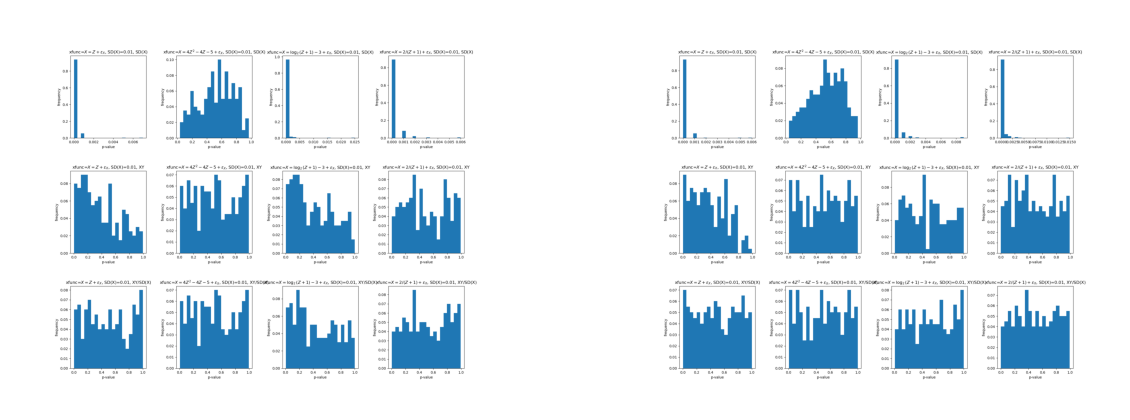

In [21]:
img1 = Image.open('./results/yfunc_0_vx_0.01.png')
img2 = Image.open('./results/yfunc_0_vx_0.5.png')

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(img1)
plt.axis('off')

plt.subplot(122)
plt.imshow(img2)
plt.axis('off')
plt.show()


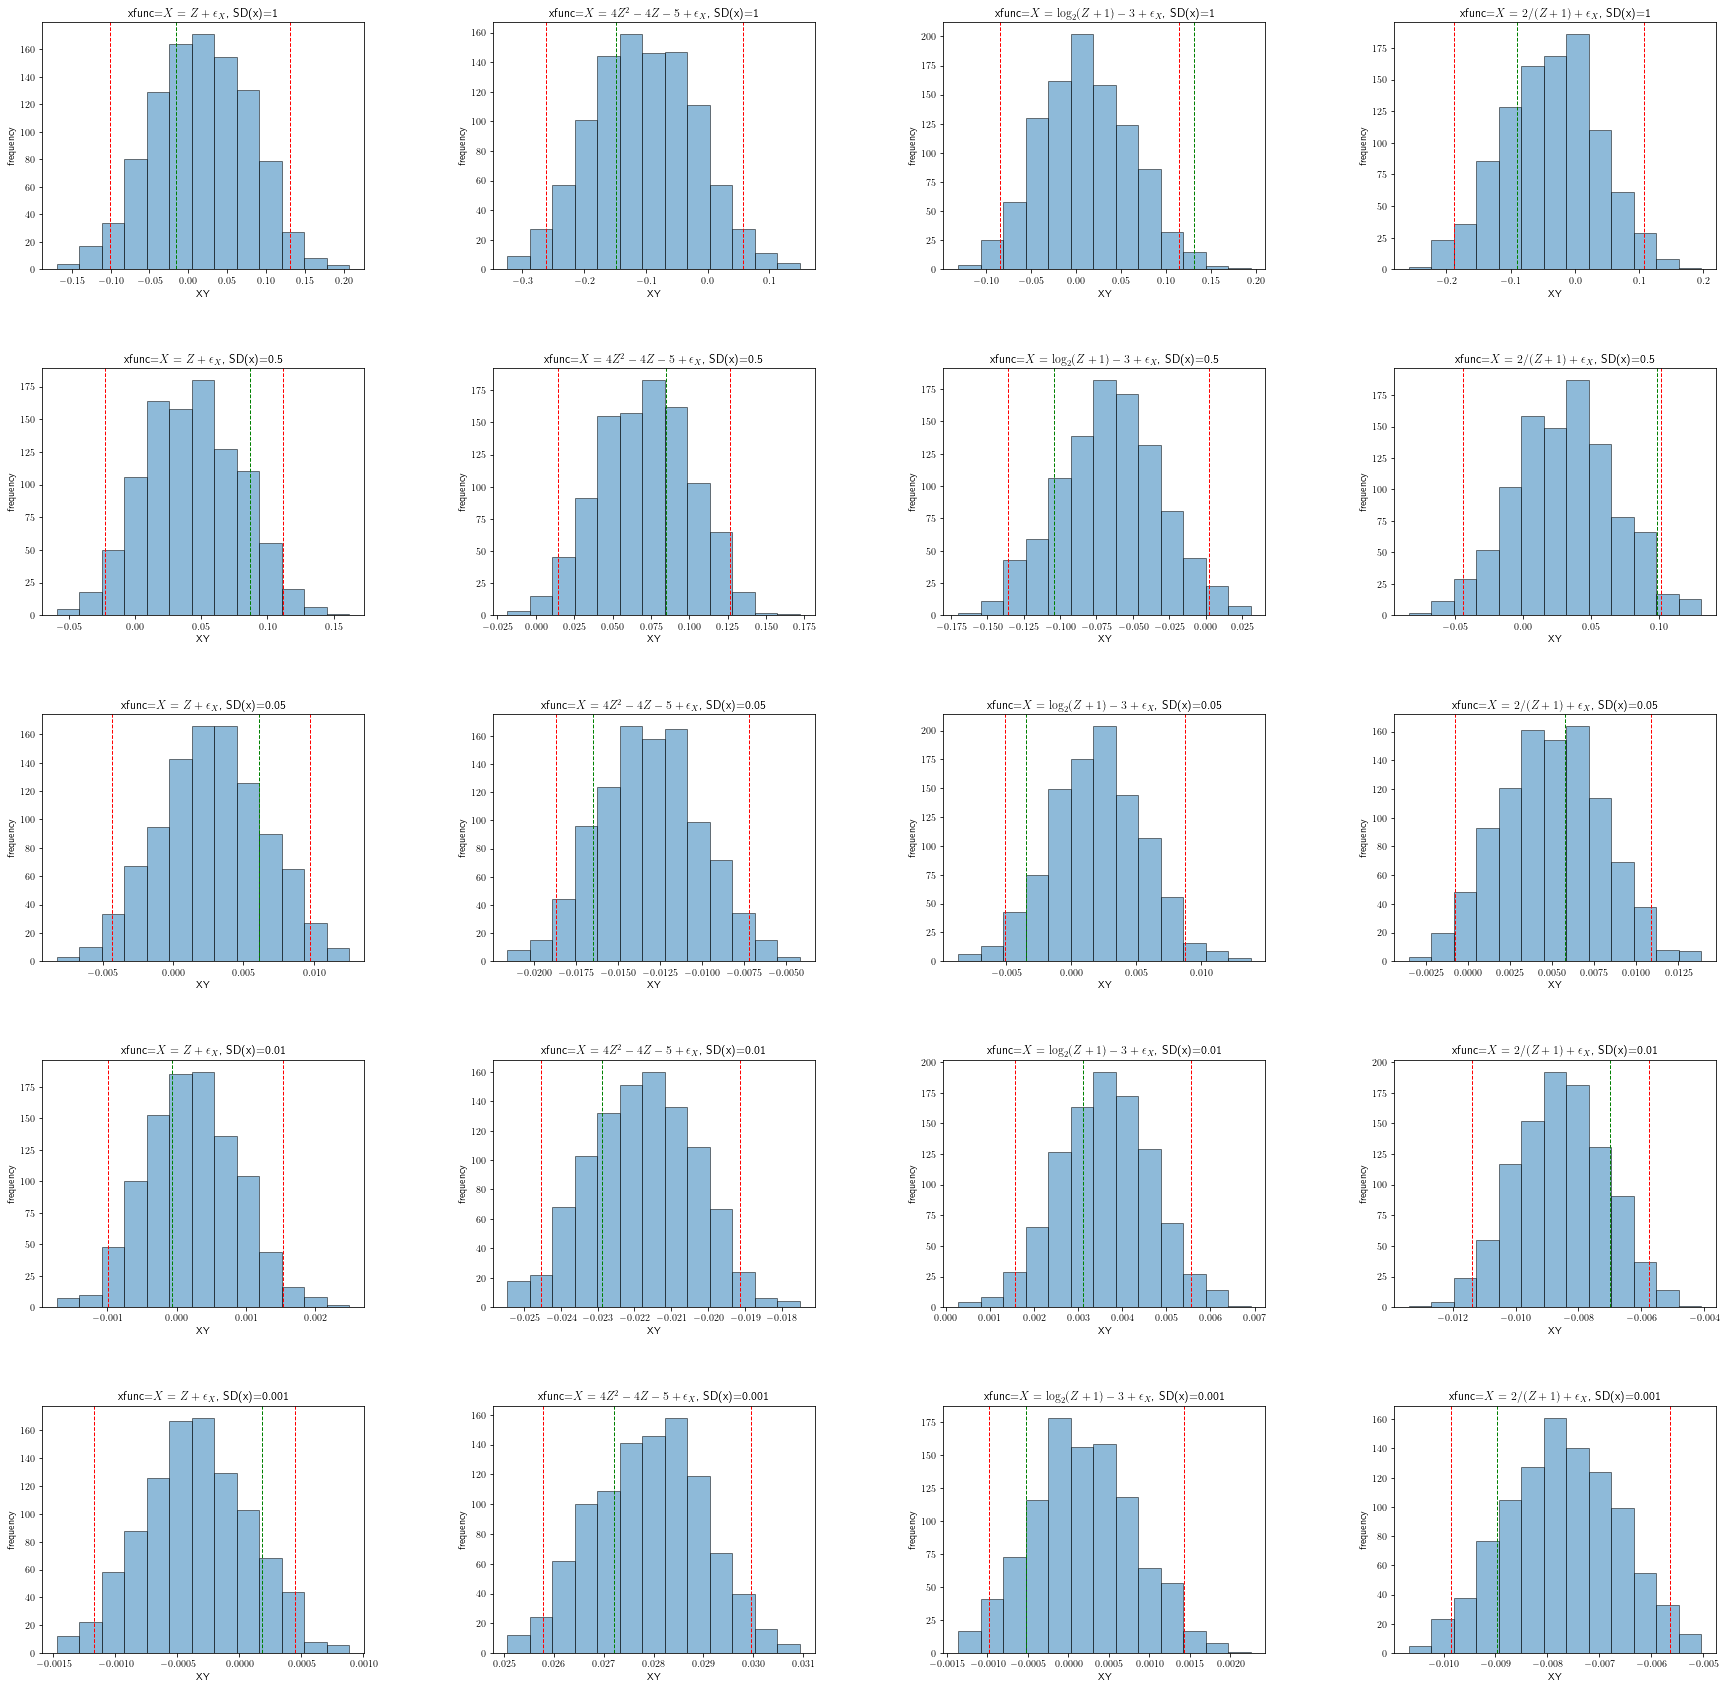

In [64]:
vxs = [1, 0.5, 0.05, 0.01, 0.001]
Ms = [2, 5, 10, 15, 25, 50]
xfuns = [None, expfunc.Z_to_Y, expfunc.Z_to_Y2, expfunc.Z_to_Y3]
xfuns_label = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
plt.figure(figsize=(30, 30))
plt.subplots_adjust(wspace=.4, hspace=.4)
for vx1 in range(len(vxs)):
    for xf in range(len(xfuns)):
        plt.subplot(5, 4, vx1*4+xf+1)
        T_sam, T_per_z = perm_var_xy(xfuns[xf], vxs[vx1])
        plt.hist(T_per_z[5,:], bins=13, edgecolor='black', alpha=0.5)
        plt.axvline(x=T_sam, color='green', linestyle='--', linewidth=1)
        plt.axvline(x=np.percentile(T_per_z[-1,:], 2.5), color='red', linestyle='--', linewidth=1)
        plt.axvline(x=np.percentile(T_per_z[-1,:], 97.5), color='red', linestyle='--', linewidth=1)
        plt.xlabel("XY")
        plt.ylabel("frequency")
        plt.title(f"xfunc={xfuns_label[xf]}, SD(x)={vxs[vx1]}")
plt.show()

## double_Z

 - when $Y$ in linear in $Z$: 
  - sometimes with uniform distribution on $\textrm{SD}(X_\sigma)$ but extremely high $X_\sigma^\top P_{Z^{\perp}}Y$ (column2) <font color='red'>$\rightarrow$ maybe due to the same generating function?</font>
  - sometimes with extremely small $\textrm{SD}(X_\sigma)$ and $X_\sigma^\top P_{Z^{\perp}}Y$ with generally non-zero mean (column1,3,4)
  -$\rightarrow$ heavy density on large percentile(>0.95) $\frac{X_\sigma^\top P_{Z^{\perp}}Y}{\textrm{SD}(X_\sigma)}$

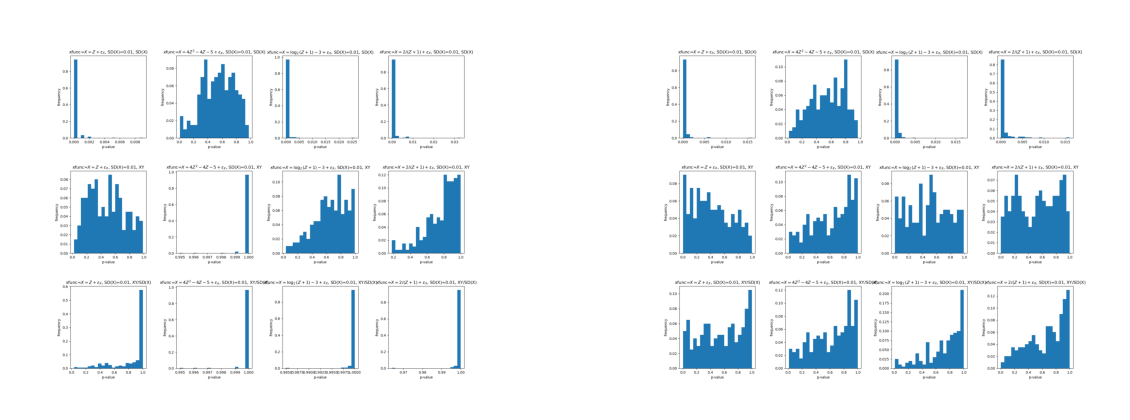

In [22]:
# when y is not linear in Z
img1 = Image.open('./results/yfunc_1_vx_0.01.png')
img2 = Image.open('./results/yfunc_1_vx_0.5.png')

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(img1)
plt.axis('off')

plt.subplot(122)
plt.imshow(img2)
plt.axis('off')
plt.show()



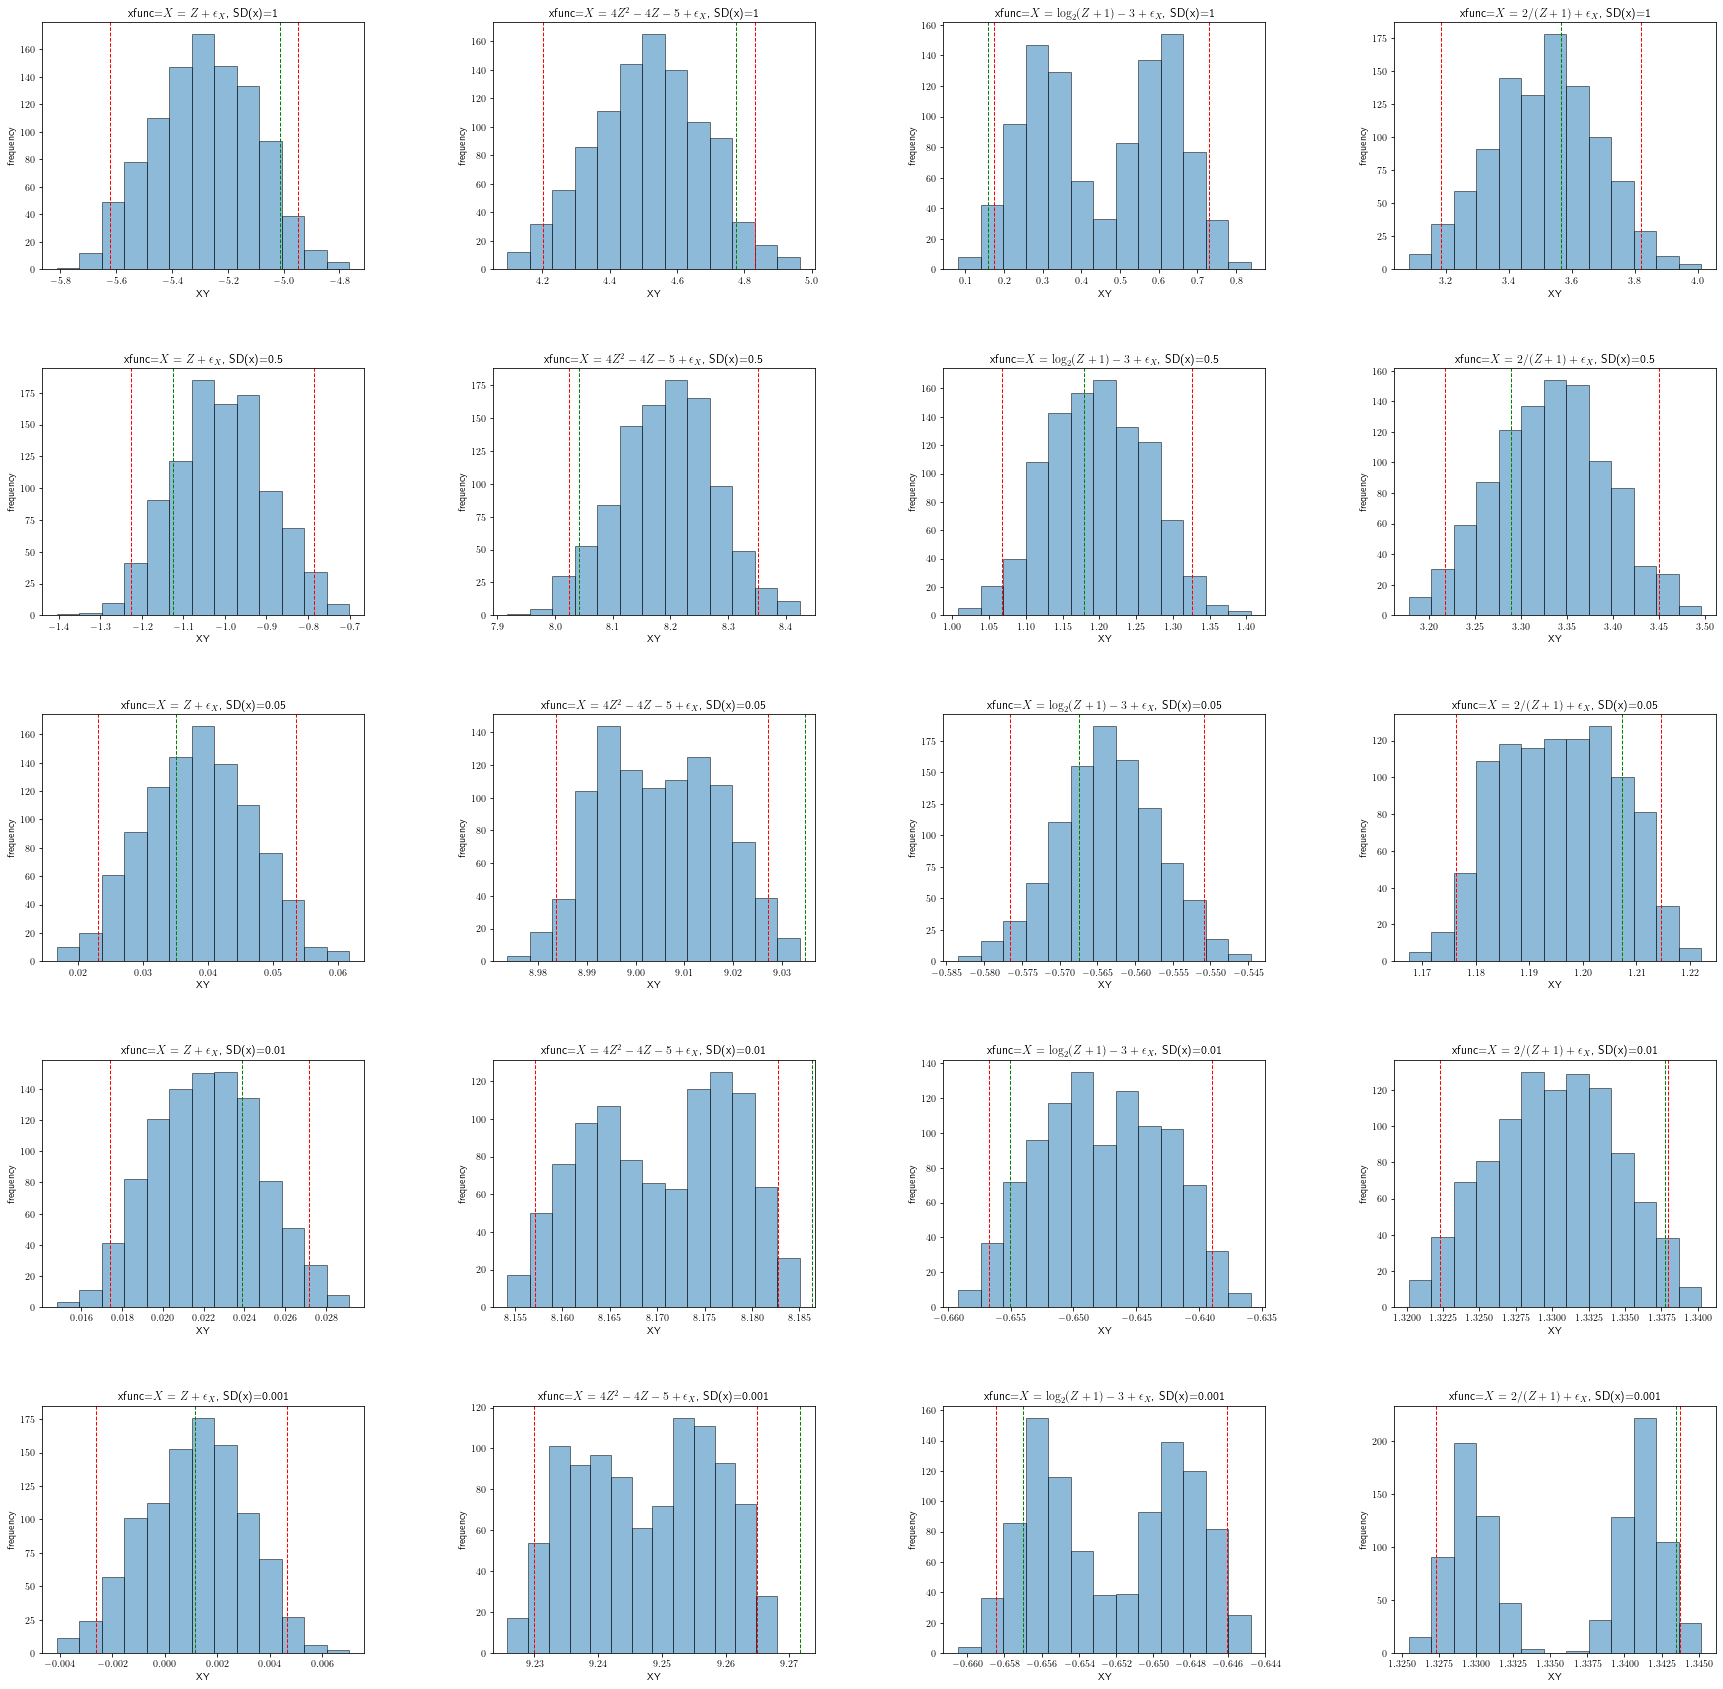

In [66]:
vxs = [1, 0.5, 0.05, 0.01, 0.001]
Ms = [2, 5, 10, 15, 25, 50]
xfuns = [None, expfunc.Z_to_Y, expfunc.Z_to_Y2, expfunc.Z_to_Y3]
xfuns_label = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
plt.figure(figsize=(30, 30))
plt.subplots_adjust(wspace=.4, hspace=.4)
for vx1 in range(len(vxs)):
    for xf in range(len(xfuns)):
        plt.subplot(5, 4, vx1*4+xf+1)
        T_sam, T_per_z = perm_var_xy(xfuns[xf], vxs[vx1])
        plt.hist(T_per_z[5,:], bins=13, edgecolor='black', alpha=0.5)
        plt.axvline(x=T_sam, color='green', linestyle='--', linewidth=1)
        plt.axvline(x=np.percentile(T_per_z[-1,:], 2.5), color='red', linestyle='--', linewidth=1)
        plt.axvline(x=np.percentile(T_per_z[-1,:], 97.5), color='red', linestyle='--', linewidth=1)
        plt.xlabel("XY")
        plt.ylabel("frequency")
        plt.title(f"xfunc={xfuns_label[xf]}, SD(x)={vxs[vx1]}")
plt.show()

## double_meanZ

 - $\textrm{SD}(X)=0.5, \textrm{SD}(Y)=0.5$

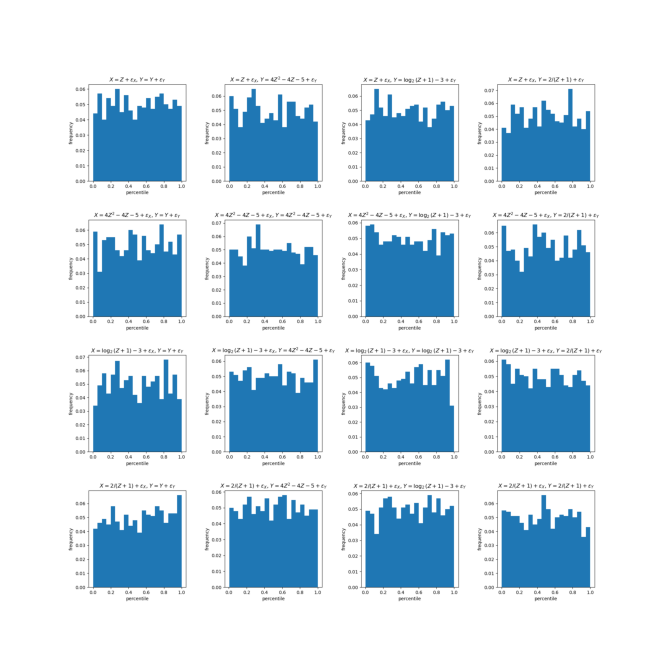

In [21]:
img = Image.open('./results/meanZ_vx_0.5_vy_0.5.png')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)

 - $\textrm{SD}(X)=0.5, \textrm{SD}(Y)=0.01$

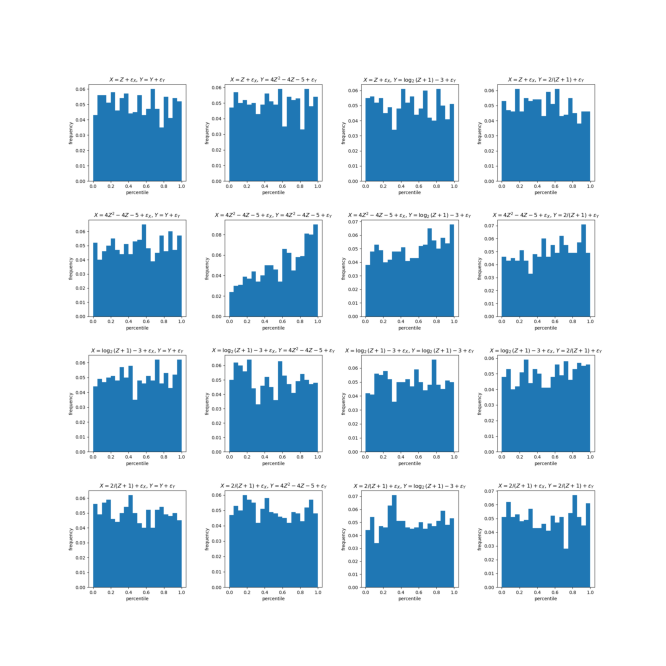

In [22]:
img = Image.open('./results/meanZ_vx_0.5_vy_0.01.png')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)

 - $\textrm{SD}(X)=0.01, \textrm{SD}(Y)=0.5$

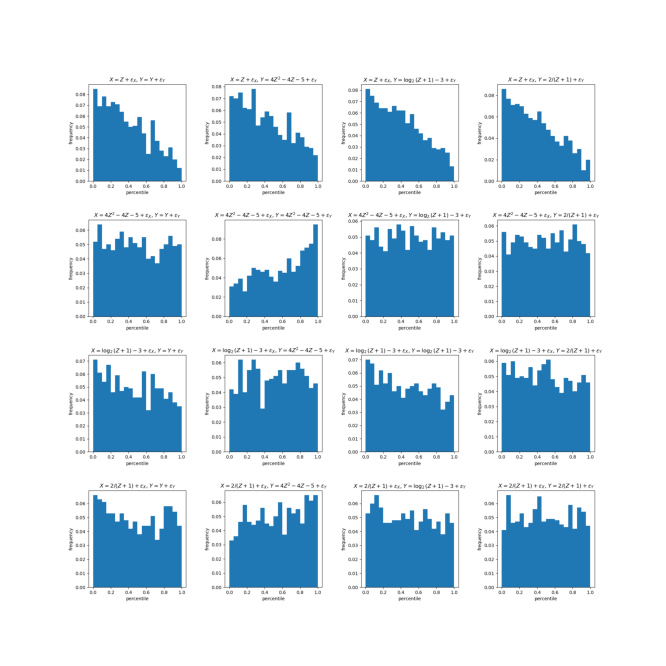

In [23]:
img = Image.open('./results/meanZ_vx_0.01_vy_0.5.png')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)

 - $\textrm{SD}(X)=0.01, \textrm{SD}(Y)=0.01$

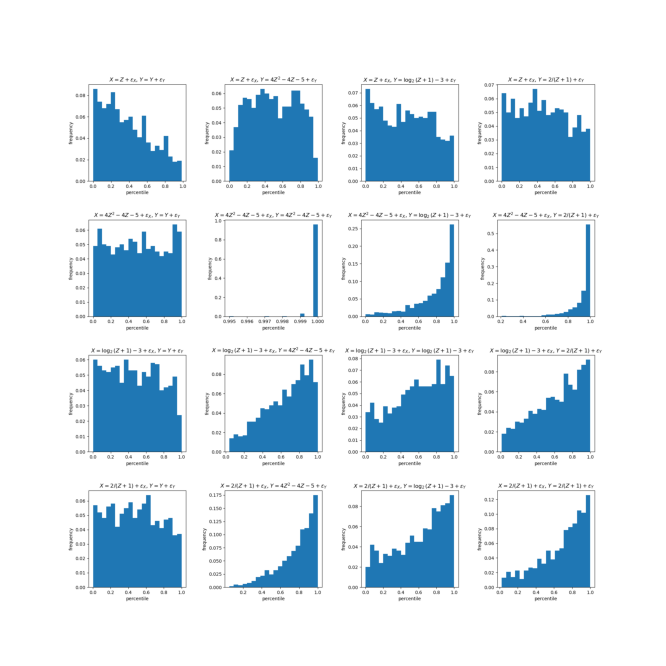

In [24]:
img = Image.open('./results/meanZ_vx_0.01_vy_0.01.png')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)

## resid_Z

 - $\textrm{SD}(X)=0.5, \textrm{SD}(Y)=0.5$

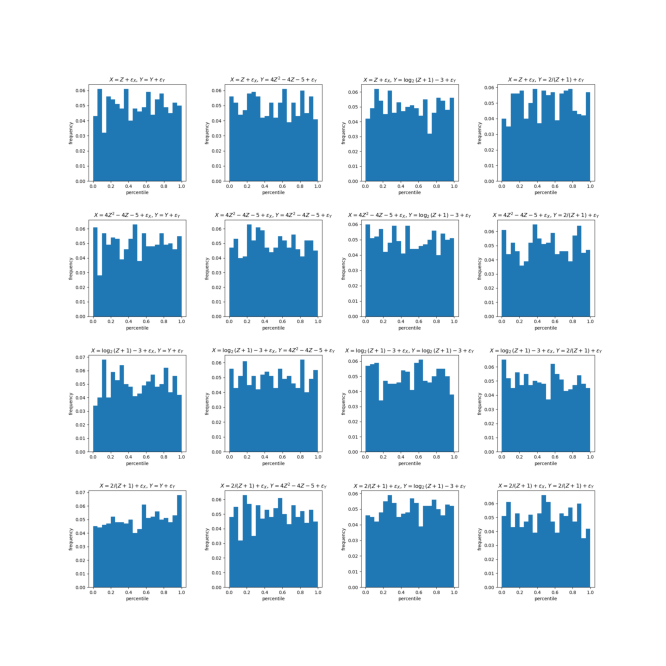

In [25]:
img = Image.open('./results/residZ_vx_0.5_vy_0.5.png')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)

 - $\textrm{SD}(X)=0.5, \textrm{SD}(Y)=0.01$

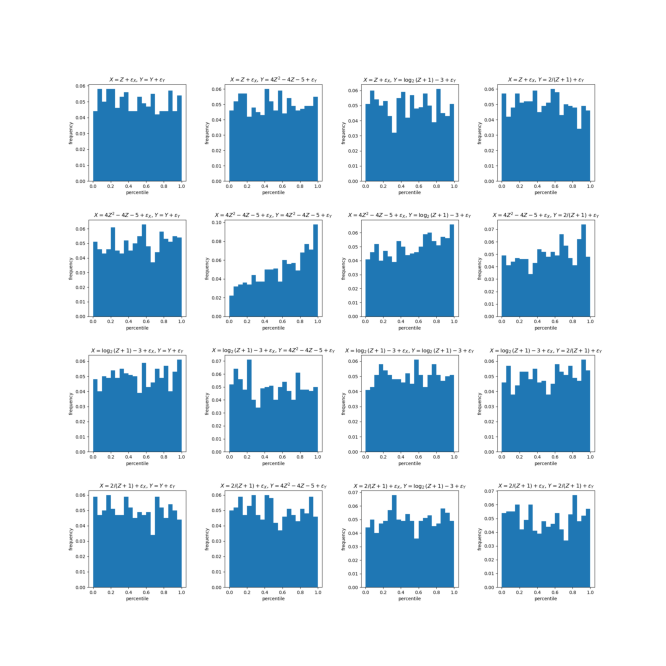

In [26]:
img = Image.open('./results/residZ_vx_0.5_vy_0.01.png')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)

 - $\textrm{SD}(X)=0.01, \textrm{SD}(Y)=0.5$

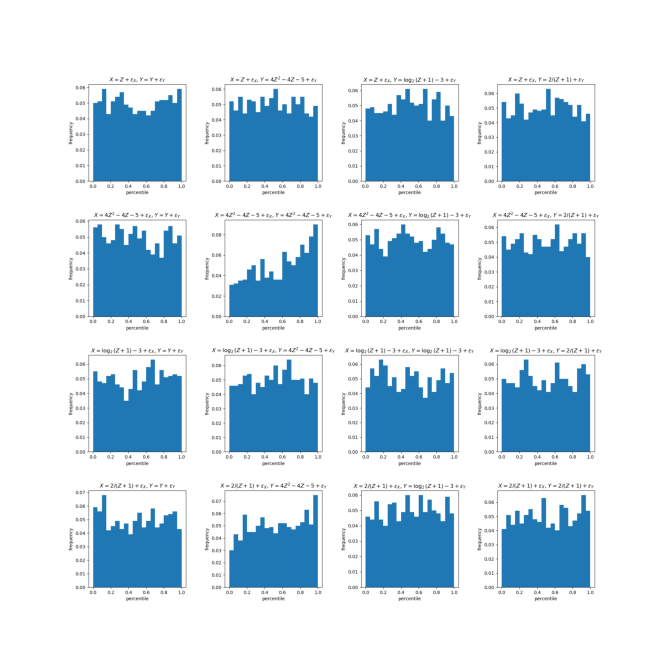

In [27]:
img = Image.open('./results/residZ_vx_0.01_vy_0.5.png')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)

 - $\textrm{SD}(X)=0.01, \textrm{SD}(Y)=0.01$

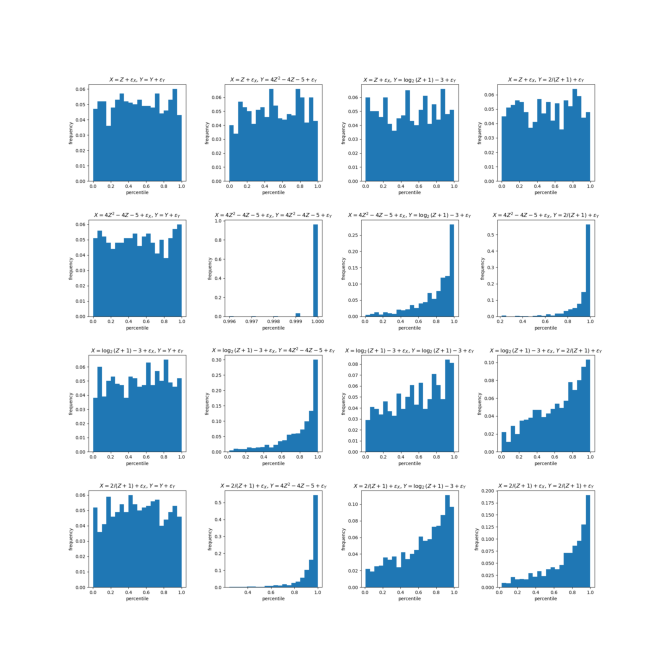

In [28]:
img = Image.open('./results/residZ_vx_0.01_vy_0.01.png')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)

## Power

 - cor = $0.4$

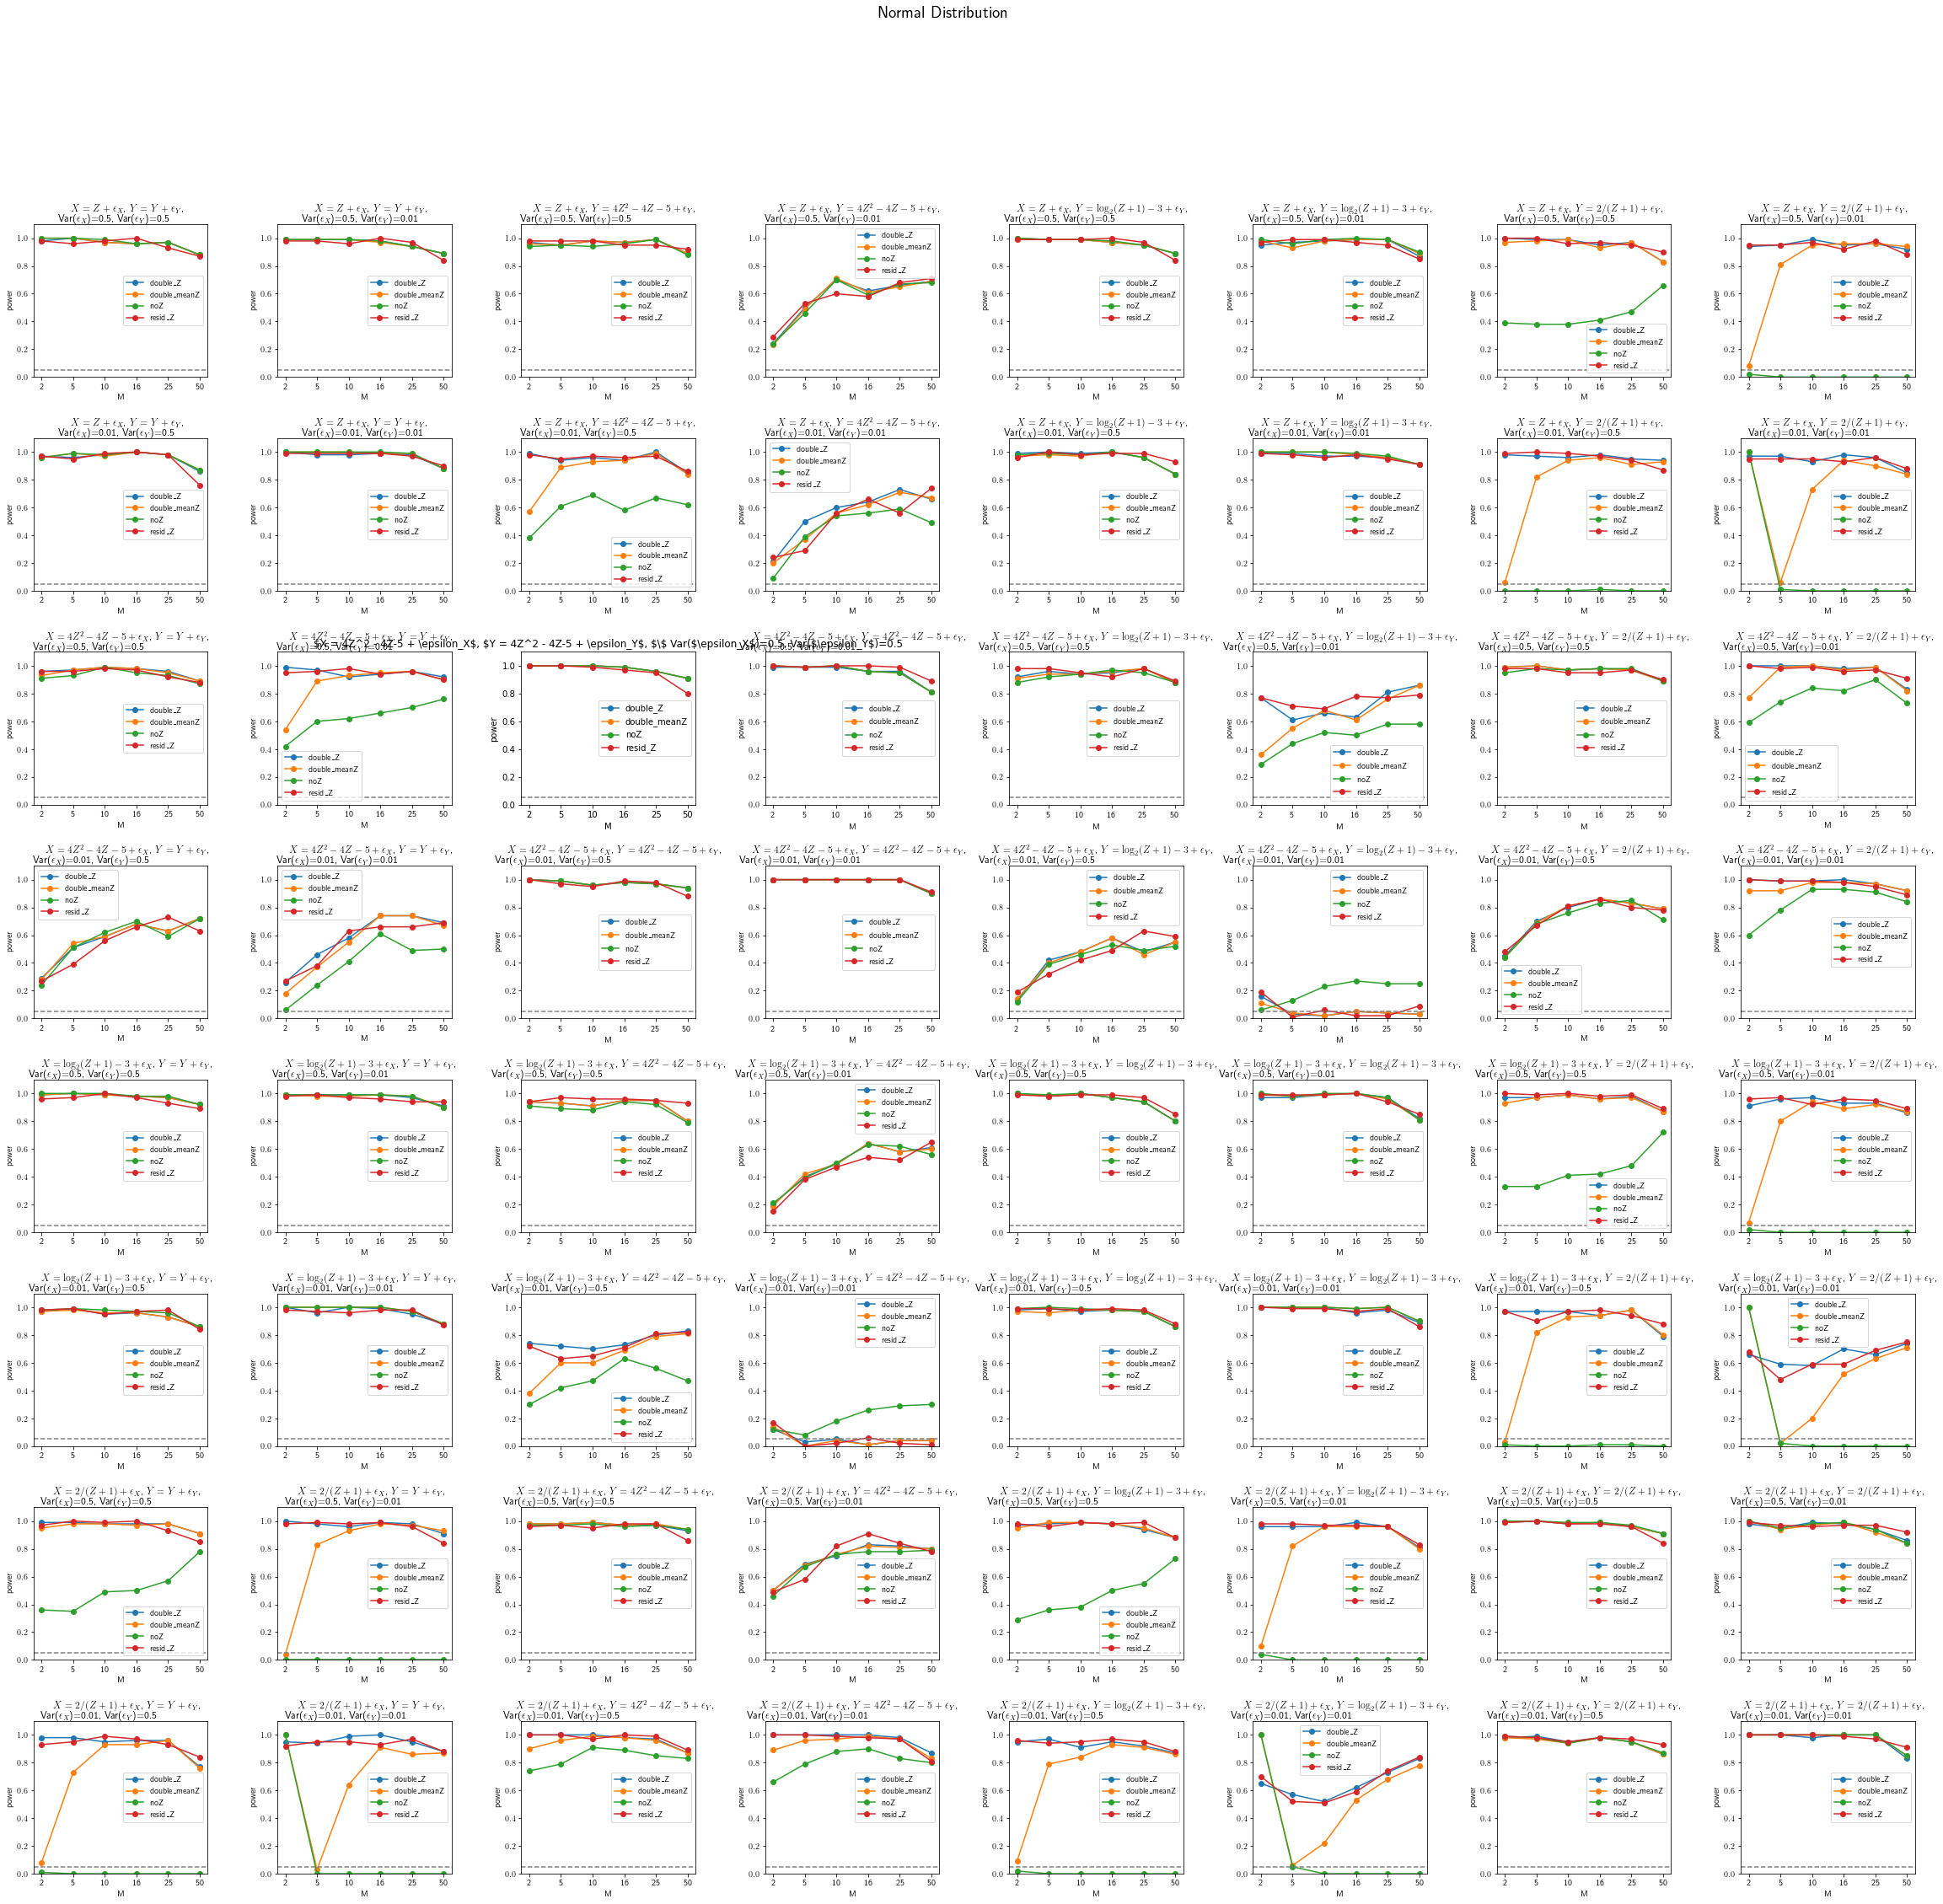

In [10]:
types = "normal"
hs = 'h1'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xff in range(4):
    xf = xff+1 if xff < 3 else 0
    for yff in range(4):
        yf = yff + 1 if yff < 3 else 0
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result1 = pd.read_csv("./results/result_9_x_func_"+str(xff)+"_"+str(yff)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result2 = pd.read_csv("./results/result_m29_x_func_"+str(xff)+"_"+str(yff)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = pd.concat([result1, result2], axis=0).iloc[:-1,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

 - cor = 0.2

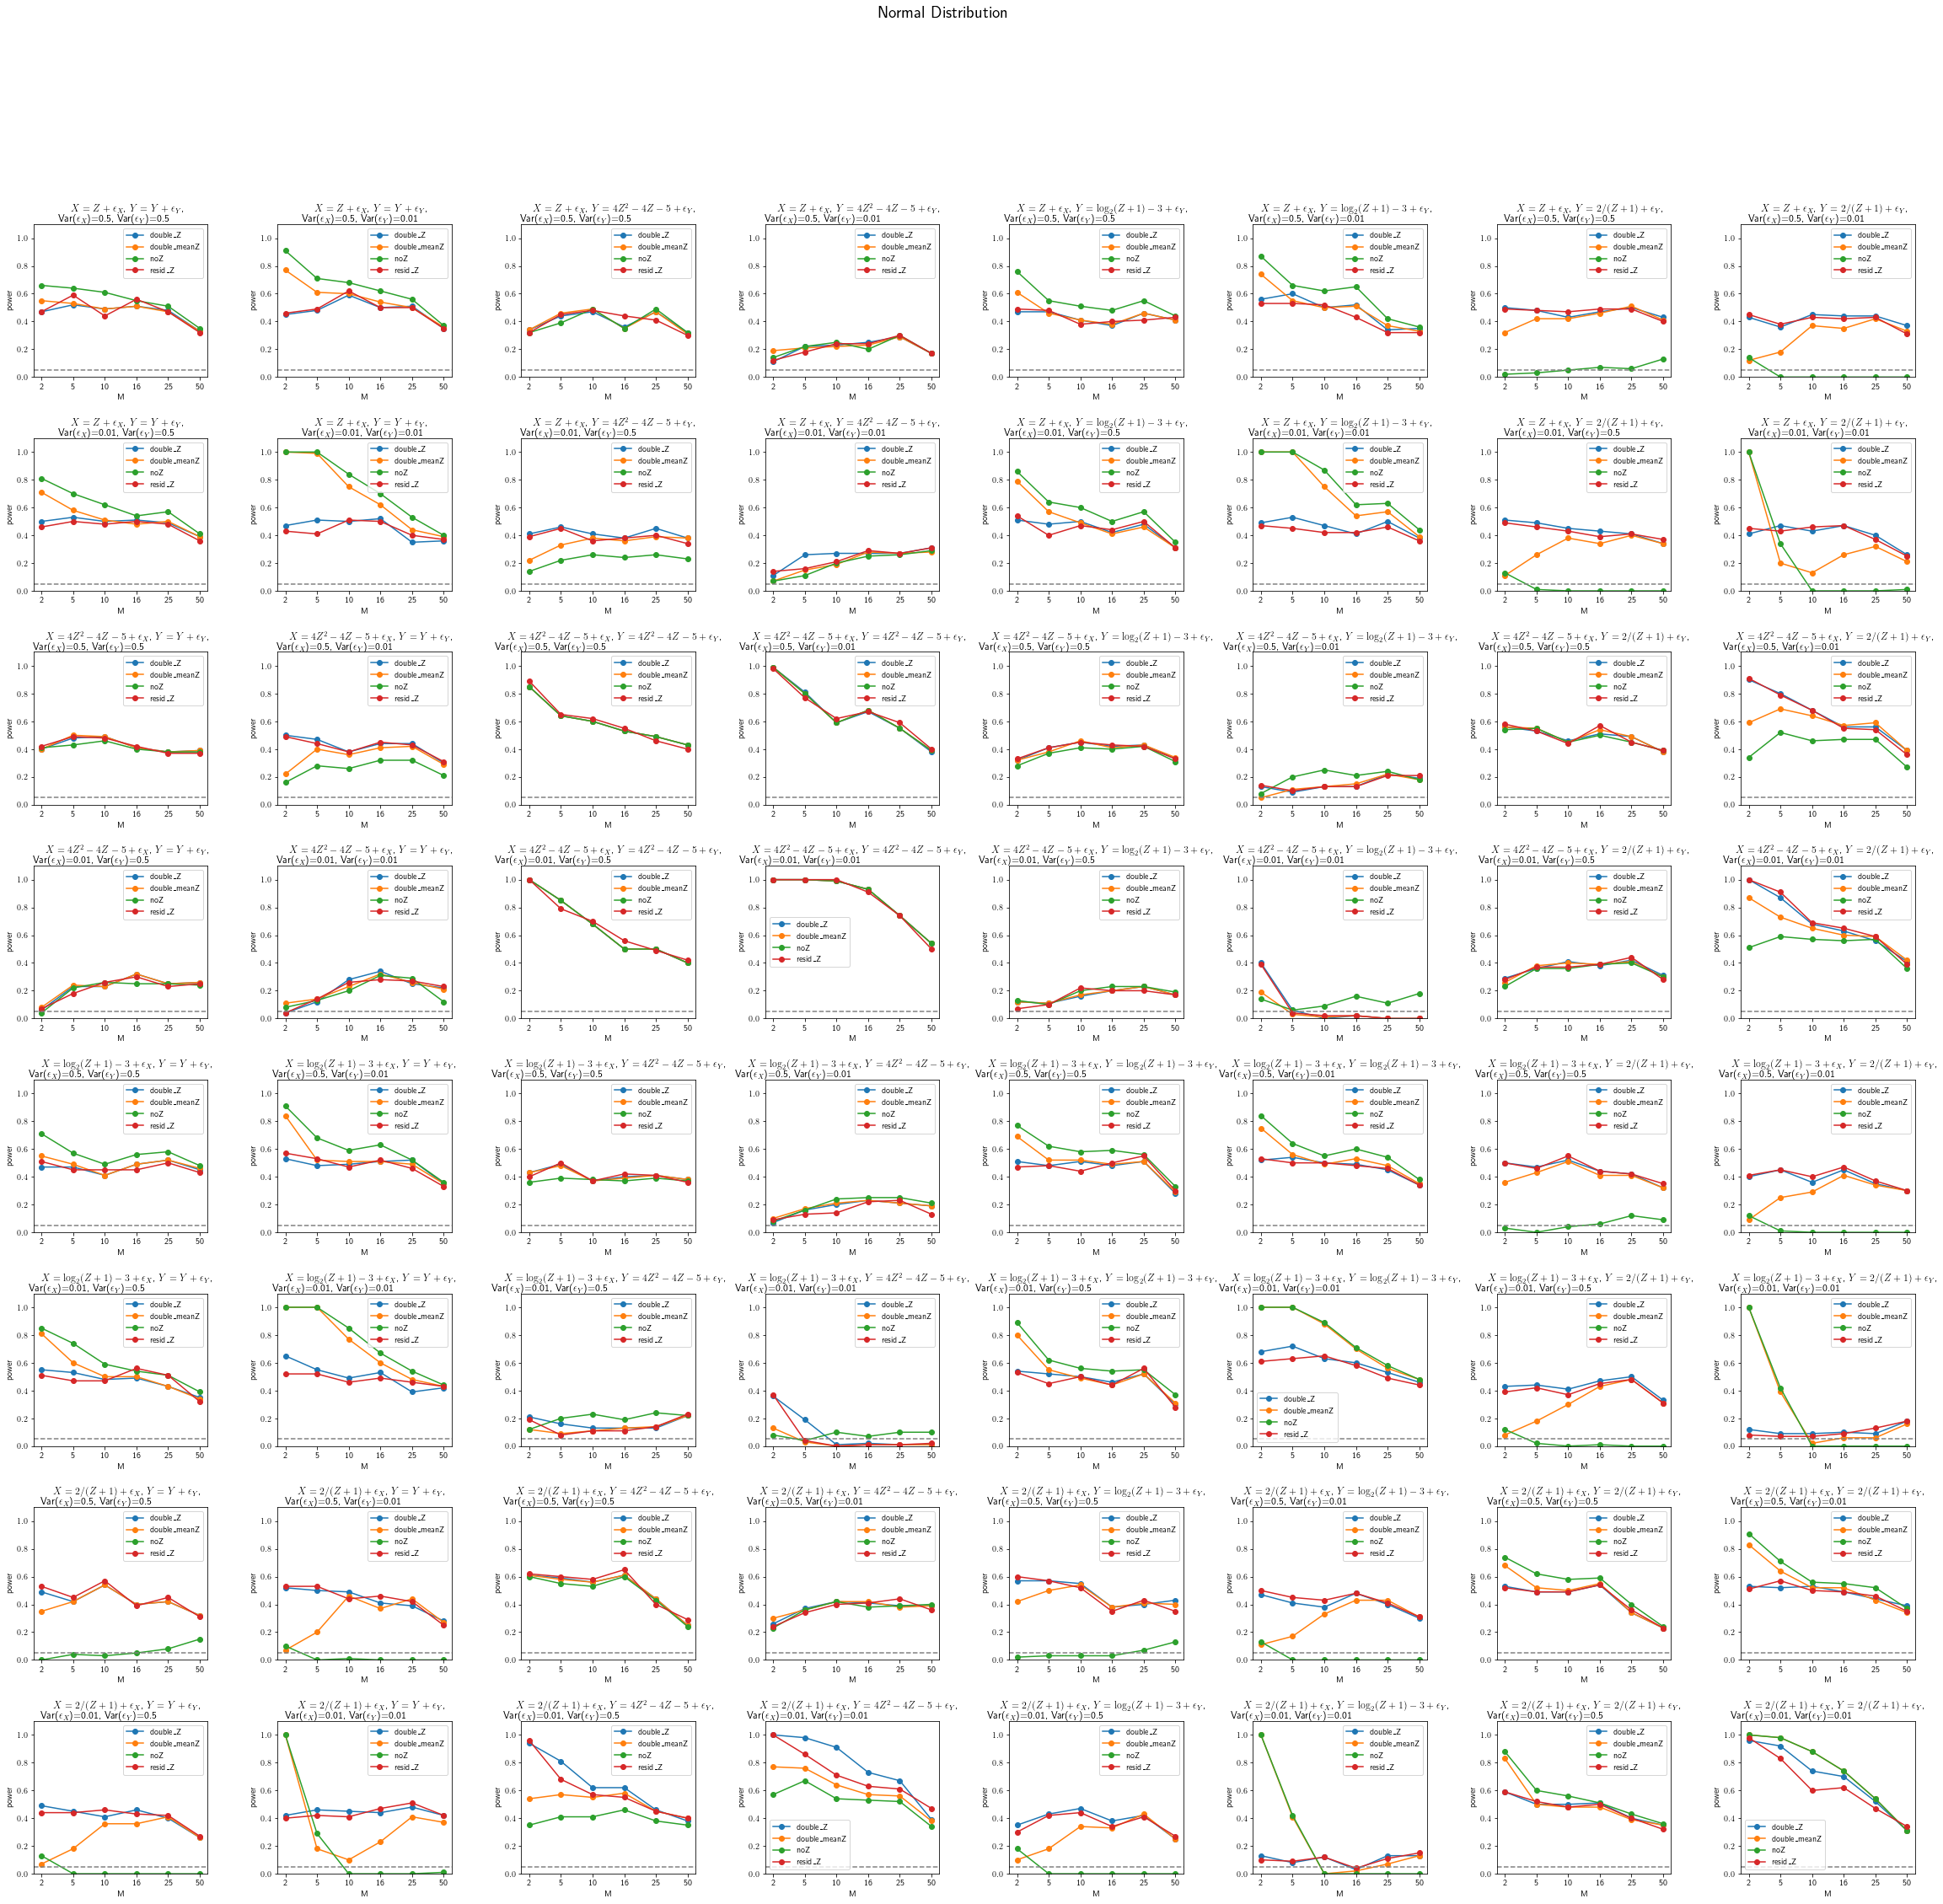

In [12]:
types = "normal"
hs = 'h1'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(4):
    for yf in range(4):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result = pd.read_csv("./results/result_10_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

In [49]:
def _perm(V, G, M):
    new_V = V.copy()
    for g in range(M):
        inds = np.where(G==g)[0]
        new_inds = inds.copy()
        np.random.shuffle(new_inds)
        new_V[new_inds] = new_V[inds]
    return new_V

def compute_resid(Z, Y):
    Z1 = sm.add_constant(Z)
    mod = sm.OLS(Y, Z1).fit()
    return mod.resid

def corr(X, Y):
    return np.abs(np.corrcoef(X, Y)[0, 1])

def compute_G(Z, M):
    G = pd.qcut(Z, M, labels=[i for i in range(M)])
    Z_means = [np.mean(Z[G == g]) for g in range(M)]
    return G, np.array([Z_means[G[i]] for i in range(Z.shape[0])])


In [389]:
def perm_var(xfunc, vx):
    X, Y, Z = expfunc.data_generative(N=100, s=1, type="normal", hypo="h0", xfun=xfunc, yfun=expfunc.Z_to_Y, cor=0.4, vx=vx, vy=0.01)
    X_resid_o = compute_resid(Z, X)
    Y_resid_o = compute_resid(Z, Y)
    # print(xfunc, vx, "=======")
    # print("X", np.mean(X_resid_o), np.std(X_resid_o))
    # print("Y", np.mean(Y_resid_o), np.std(Y_resid_o))
    #T_sam = np.dot(X_resid_o, X_resid_o)
    T_sam = np.std(X_resid_o)

    B = 1000
    Ms = [2, 5, 10, 15, 25, 50]
    T_per_z = np.zeros([len(Ms), B])

    for m in range(len(Ms)):
        #print("Processing M=", Ms[m])
        G, _ = compute_G(Z, Ms[m])
        for i in range(B):
            new_X = _perm(X, G, Ms[m])
            X_resid_temp = compute_resid(Z, new_X)
            #T_per_z[m, i] = np.dot(X_resid_temp, X_resid_temp)
            T_per_z[m, i] = np.std(X_resid_temp)
    
    return T_sam, T_per_z

In [65]:
def perm_var_xy(xfunc, vx):
    X, Y, Z = expfunc.data_generative(N=100, s=1, type="normal", hypo="h0", xfun=xfunc, yfun=expfunc.Z_to_Y, cor=0.4, vx=vx, vy=0.01)
    X_resid_o = compute_resid(Z, X)
    #Y_resid_o = np.random.normal(loc=0, scale=0.01, size=100)
    Y_resid_o = compute_resid(Z, Y)
    # print(xfunc, vx, "=======")
    # print("X", np.mean(X_resid_o), np.std(X_resid_o))
    # print("Y", np.mean(Y_resid_o), np.std(Y_resid_o))
    #T_sam = np.abs(np.corrcoef(X_resid_o, Y_resid_o)[0,1])
    T_sam = np.dot(X_resid_o, Y_resid_o)

    B = 1000
    Ms = [2, 5, 10, 15, 25, 50]
    T_per_xy = np.zeros([len(Ms), B])

    for m in range(len(Ms)):
        #print("Processing M=", Ms[m])
        G, _ = compute_G(Z, Ms[m])
        for i in range(B):
            new_X = _perm(X, G, Ms[m])
            T_per_xy[m, i] = np.dot(compute_resid(Z, new_X), Y_resid_o)
    
    return T_sam, T_per_xy


In [387]:
def perm_var_cor(xfunc, vx):
    X, Y, Z = expfunc.data_generative(N=100, s=1, type="normal", hypo="h0", xfun=xfunc, yfun=expfunc.Z_to_Y, cor=0.4, vx=vx, vy=0.01)
    X_resid_o = compute_resid(Z, X)
    #Y_resid_o = np.random.normal(loc=0, scale=0.01, size=100)
    Y_resid_o = compute_resid(Z, Y)
    # print(xfunc, vx, "=======")
    # print("X", np.mean(X_resid_o), np.std(X_resid_o))
    # print("Y", np.mean(Y_resid_o), np.std(Y_resid_o))
    T_sam = np.abs(np.corrcoef(X_resid_o, Y_resid_o)[0,1])

    B = 1000
    Ms = [2, 5, 10, 15, 25, 50]
    T_per_xy = np.zeros([len(Ms), B])

    for m in range(len(Ms)):
        #print("Processing M=", Ms[m])
        G, _ = compute_G(Z, Ms[m])
        for i in range(B):
            new_X = _perm(X, G, Ms[m])
            T_per_xy[m, i] = np.abs(np.corrcoef(compute_resid(Z, new_X), Y_resid_o)[0,1])
    
    return T_sam, T_per_xy


In [5]:
def perm_var_zmean(xfunc, vx):
    X, Y, Z = expfunc.data_generative(N=100, s=1, type="normal", hypo="h0", xfun=xfunc, yfun=expfunc.Z_to_Y, cor=0.4, vx=vx, vy=0.01)
    
    m = 50
    G, ZZ = compute_G(Z, m)
    X_resid_o = compute_resid(ZZ, X)
    Y_resid_o = compute_resid(ZZ, Y)
    T_sam = np.std(X_resid_o)

    B = 1000
    
    T_per_z = np.zeros(B)

    for i in range(B):
        new_X = _perm(X, G, m)
        X_resid_temp = compute_resid(ZZ, new_X)
        #T_per_z[m, i] = np.dot(X_resid_temp, X_resid_temp)
        T_per_z[i] = np.std(X_resid_temp)
    
    return T_sam, T_per_z